In [1]:
import PIL
import torch
import matplotlib.pyplot as plt 
from torchvision.transforms import v2

from model_version_02 import VisionTransformer

model = VisionTransformer(
    img_size=(360, 640),
    patch_size=16,
    embed_dim=1024,
    depth=5,
    num_heads=8,
    mlp_dim=4096,
)

weigths = torch.load("../training_progress/upscaler_ver_2_e200.pt")
model.load_state_dict(weigths)

<All keys matched successfully>

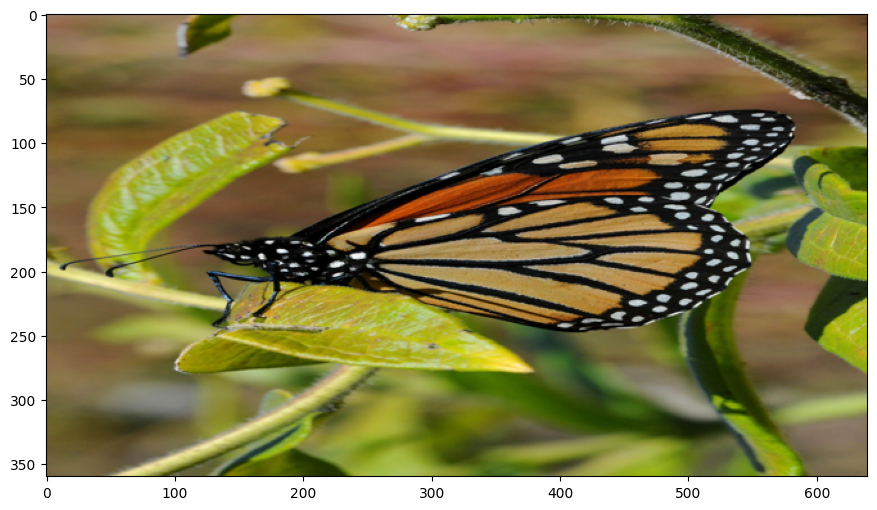

In [ ]:
imagePath = "butterfly.png"

transform = v2.Compose(
    [v2.PILToTensor(), v2.ToDtype(torch.float32, scale=True)]
)

im = PIL.Image.open(imagePath)
X = im.resize((640, 360))
X = transform(X)
plt.figure(figsize=(12, 8))
plt.imshow(X.permute(1, 2, 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.15350659..1.0719995].


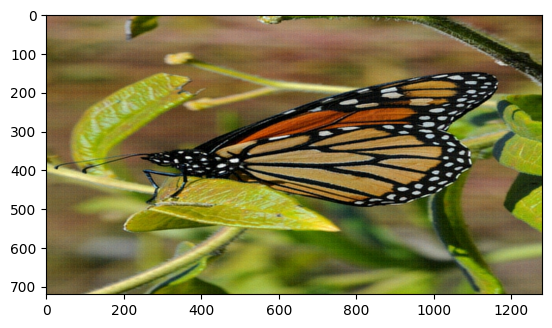

In [ ]:
X = model(X.unsqueeze(0))
plt.figure(figsize=(12, 6))
plt.imshow(X.detach().squeeze(0).permute(1, 2, 0))